In [81]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
^C
User cancelled operation


In [ ]:
!unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast

In [ ]:
style.use('seaborn-poster')
style.use('ggplot')

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_23655/2324539283.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [ ]:

data = pd.read_csv("movies_metadata.csv")
data.head()

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_23655/1626265438.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
filtered_data = data.filter(['original_title', 'overview', 'id', 'genres'], axis=1)
len(filtered_data)

45466

In [ ]:
genres = filtered_data['genres'].tolist()

In [ ]:
genres

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

In [ ]:
genre_per_movie = []
genre_dict = {}
invalid_genres = ['Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands',
                  'Mardock Scramble Production Committee', 'Odyssey Media',
                  'Pulser Productions', 'Rogue State', 'Sentai Filmworks',
                  'Telescene Film Group Productions', 'The Cartel', 'Vision View Entertainment', 
                  'TV Movie', 'Foreign']
for genre in genres:
  genre = ast.literal_eval(genre)
  genre_list = []
  for val in genre:
    if val['name'] not in invalid_genres:
      genre_list.append(val['name'])
      if val['name'] in genre_dict:
        genre_dict[val['name']] += 1
      else:
        genre_dict[val['name']] = 1
  genre_per_movie.append(genre_list)

genre_dict = {key:val for key, val in genre_dict.items() if val != 1}
genre_dict

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042}

In [ ]:
len(genre_per_movie)

45466

In [ ]:
keys = list(genre_dict.keys())
values = list(genre_dict.values())

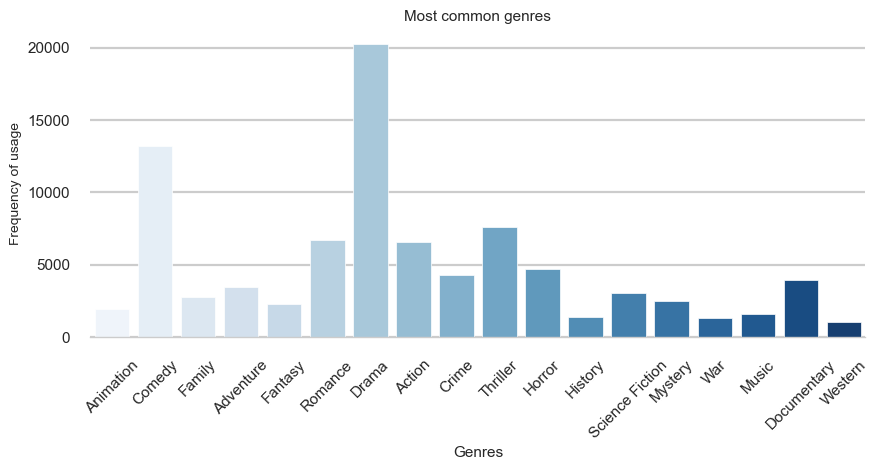

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 4))  # Create a figure with desired size
sns.set_style("whitegrid")  # Optional: Set background style (optional)
sns.barplot(x=keys, y=values, palette="Blues")  # Create bar chart with color scheme
sns.despine(left=True)  # Remove left spine from the chart (optional)
plt.title("Most common genres", size=11)  # Add title
plt.ylabel('Frequency of usage', size=10)  # Label y-axis
plt.xticks(size=11, rotation=45)  # Rotate x-axis tick labels for better readability (optional)
plt.yticks(size=11)  # Set y-axis tick size (optional)
plt.xlabel('Genres', size=11)  # Use plt.xlabel for x-axis label

plt.show()  # Display the plot


In [ ]:
filtered_data['genre_list'] = genre_per_movie
filtered_data.head()     

,original_title,overview,id,genres,genre_list
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]


In [ ]:
filtered_data = filtered_data[filtered_data['genre_list'].map(lambda d: len(d)) > 0]
len(filtered_data)

42995

In [ ]:
total_empty = 0
for genre in genre_per_movie:
  if not len(genre):
    total_empty += 1

total_empty

2471

In [ ]:
from bs4 import BeautifulSoup
import requests
import os
     

In [ ]:
!pip install tmdbv3api

In [ ]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'

In [ ]:

def get_posters(url, name):
  try:
    baseurl = 'http://image.tmdb.org/t/p/w185'
    link = baseurl + url
    img = requests.get(link).content
    name = name.replace('/', '_')
    file_name = str(name) + ".jpg"
    path = os.path.join('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters', file_name)
    with open(path, 'wb') as handler:
      handler.write(img)
    return path
  except Exception as e:
    print('[ERROR]', str(e))
    return "Error"

In [ ]:

poster_paths = []
movie = Movie()

i = 1
for id, name in zip(filtered_data['id'].tolist(), filtered_data['original_title'].tolist()):
  m = movie.details(int(id))
  print('Downloading:', name, "i", i)
  try:
    poster_paths.append(get_posters(m.poster_path, name))
  except Exception as e:
    print('[ERROR]', str(e))
    poster_paths.append("API Error")
  i += 1
  # temp = name.replace('/', '_')
  # file_name = str(temp) + ".jpg"
  # path = os.path.join('/content/drive/My Drive/Movie_genre_prediction_dataset/downloaded_posters', file_name)
  # if '/' in name:
  #   print(name)
  #   print("Path:", path)

print(len(poster_paths))

Downloading: Toy Story i 1
Downloading: Jumanji i 2
Downloading: Grumpier Old Men i 3
Downloading: Waiting to Exhale i 4
Downloading: Father of the Bride Part II i 5
Downloading: Heat i 6
Downloading: Sabrina i 7
Downloading: Tom and Huck i 8
Downloading: Sudden Death i 9
Downloading: GoldenEye i 10
Downloading: The American President i 11
Downloading: Dracula: Dead and Loving It i 12
Downloading: Balto i 13
Downloading: Nixon i 14
Downloading: Cutthroat Island i 15
Downloading: Casino i 16
Downloading: Sense and Sensibility i 17
Downloading: Four Rooms i 18
Downloading: Ace Ventura: When Nature Calls i 19
Downloading: Money Train i 20
Downloading: Get Shorty i 21
Downloading: Copycat i 22
Downloading: Assassins i 23
Downloading: Powder i 24
Downloading: Leaving Las Vegas i 25
Downloading: Othello i 26
Downloading: Now and Then i 27
Downloading: Persuasion i 28
Downloading: La Cité des Enfants Perdus i 29
Downloading: 摇啊摇，摇到外婆桥 i 30
Downloading: Dangerous Minds i 31
Downloading: Twelve

TMDbException: The resource you requested could not be found.

In [82]:
import os
from tmdbv3api import TMDb, Movie

# Function to download posters (dummy implementation)
def get_posters(base_url, poster_path, name):
    import requests
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return path  # Skip download if file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initialize TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Track existing downloaded files
download_path = '/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters'
downloaded_files = {name.replace('/', '_') + ".jpg" for name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(filtered_data['id'].tolist(), filtered_data['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name in downloaded_files:
        print(f"Skipping {name}, already downloaded.")
        poster_paths.append(os.path.join(download_path, file_name))
        continue

    try:
        m = movie.details(int(id))
        print('Downloading:', name, "i", i)
        poster_path = get_posters(base_url, m.poster_path, name)
        poster_paths.append(poster_path)
    except Exception as e:
        error_message = str(e)
        if "The resource you requested could not be found" in error_message:
            print('[TMDb ERROR]', error_message)
            poster_paths.append("TMDb Error")
        else:
            print('[ERROR]', error_message)
            poster_paths.append("API Error")

    i += 1
print(len(poster_paths))


Downloading: Toy Story i 1
Downloading: Jumanji i 2
Downloading: Grumpier Old Men i 3
Downloading: Waiting to Exhale i 4
Downloading: Father of the Bride Part II i 5
Downloading: Heat i 6
Downloading: Sabrina i 7
Downloading: Tom and Huck i 8
Downloading: Sudden Death i 9
Downloading: GoldenEye i 10
Downloading: The American President i 11
Downloading: Dracula: Dead and Loving It i 12
Downloading: Balto i 13
Downloading: Nixon i 14
Downloading: Cutthroat Island i 15
Downloading: Casino i 16
Downloading: Sense and Sensibility i 17
Downloading: Four Rooms i 18
Downloading: Ace Ventura: When Nature Calls i 19
Downloading: Money Train i 20
Downloading: Get Shorty i 21
Downloading: Copycat i 22
Downloading: Assassins i 23
Downloading: Powder i 24
Downloading: Leaving Las Vegas i 25
Downloading: Othello i 26
Downloading: Now and Then i 27
Downloading: Persuasion i 28
Downloading: La Cité des Enfants Perdus i 29
Downloading: 摇啊摇，摇到外婆桥 i 30
Downloading: Dangerous Minds i 31
Downloading: Twelve

In [84]:
filtered_data

,original_title,overview,id,genres,genre_list
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
...,...,...,...,...,...
45459,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,222848,"[{'id': 878, 'name': 'Science Fiction'}]",[Science Fiction]
45460,Robin Hood,"Yet another version of the classic epic, with ...",30840,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[Drama, Action, Romance]"
45461,رگ خواب,Rising and falling between a man and woman.,439050,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[Drama, Family]"
45462,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,111109,"[{'id': 18, 'name': 'Drama'}]",[Drama]


In [85]:

filtered_data['poster_paths'] = poster_paths
filtered_data.head()
     

,original_title,overview,id,genres,genre_list,poster_paths
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
